In [7]:
!pip install selenium
!pip install webdriver_manager

In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from time import sleep
import random

In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - ====== WebDriver manager ======


[WDM] - Current google-chrome version is 87.0.4280
[WDM] - Get LATEST driver version for 87.0.4280
[WDM] - Driver [/Users/dariyamamayeva/.wdm/drivers/chromedriver/mac64/87.0.4280.88/chromedriver] found in cache


In [4]:
driver.get('https://krisha.kz/prodazha/kvartiry/karaganda-kazybek-bi/')

In [5]:
homes=[]
def obtain_links(link):
    driver.get(link)
    results = driver.find_elements_by_xpath('.//div[@class="a-card__header-left"]')
    for result in results:
        a = result.find_element_by_tag_name('a')
        #print(a.text)
        #print(a.get_attribute('href'))
        homes.append(a.get_attribute('href'))

In [6]:
obtain_links('https://krisha.kz/prodazha/kvartiry/karaganda-kazybek-bi/')
for i in range (2,6):
    link='https://krisha.kz/prodazha/kvartiry/karaganda-kazybek-bi/?page='+str(i)
    obtain_links(link)

In [7]:
len(homes)

103

In [82]:
classname=[]
results = driver.find_elements_by_xpath('.//div[@class="offer__advert-info"]')
for result in results:
    classname=result.find_elements_by_class_name('offer__advert-short-info')

In [92]:
for i in classname:
    print(i.text)
#classname[0].text[:-18]

Караганда, Казыбек би р-н
показать на карте
панельный, 2008 г.п.
1 из 10
46 м²


In [8]:
def phone(link):
    phone1=""
    driver.get(link)
    sleep(1.5)
    contacts = driver.find_element_by_xpath('.//span[@id="tm-telephone-body"]')
    contacts.click()
    sleep(2)
    phones=driver.find_element_by_xpath('.//div[@class="offer__contacts"]')
    phone=str(phones.find_element_by_class_name('offer__contacts-phones').text.replace(' ',''))
    return phone

In [10]:
#print(phone(homes[40]))
#homes[40]
for i in range (0,10):
    print(phone(homes[i]))

+77052549032
+77015387594
+77773047191
+77013423962
+77018000555
+77784854650
+77785424010
+77770397788
+77029855762
+77025455535
+77029332488
+77029855762


In [9]:
import csv
filename = 'house_info.csv'
with open(filename, 'w') as f:
    w = csv.writer(f)
    w.writerow(['Name', 'Price', 'City', 'House', 'Floor', 'Area', 'Owner', 'Phone'])

In [10]:
def write_info(link):
    driver.get(link)
    h1=driver.find_element_by_tag_name('h1').text
    price=driver.find_element_by_class_name('offer__price').text[:-2]
    results = driver.find_elements_by_xpath('.//div[@class="offer__advert-info"]')
    for result in results:
        classname=result.find_elements_by_class_name('offer__advert-short-info')
    city=classname[0].text[:-18]
    house=classname[1].text
    floor=classname[2].text
    area=classname[3].text
    names = driver.find_elements_by_xpath('.//div[@class="offer__sidebar-sticky"]')
    for name in names:    
        owner=name.find_element_by_class_name('owners__name').text
    with open(filename, 'a',encoding='utf-8') as f:
        w = csv.writer(f)
        w.writerow([h1, price, city, house, floor, area, owner, phone(link)])

In [120]:
driver.get('https://krisha.kz/a/show/664465440')
name=driver.find_element_by_tag_name('h1').text
print(name)

2-комнатная квартира, 44.4 м², 1/5 этаж, проспект Нурсултана Назарбаева 78


In [139]:
import pandas as pd
df=pd.read_csv('/Users/dariyamamayeva/house_info.csv')

In [86]:
df.head()

,Name,Price,City,House,Floor,Area,Owner,Phone
0,"2-комнатная квартира, 46 м², 1/10 этаж, Ермеко...",14 000 000,"Караганда, Казыбек би р-н","панельный, 2008 г.п.",1 из 10,46 м²,"ИП ""Чистая жизнь """,+77052549032
1,"3-комнатная квартира, 220 м², 1/3 этаж, Мкр Ал...",55 000 000,"Караганда, Казыбек би р-н","кирпичный, 2016 г.п.",1 из 3,"220 м², жилая — 96 м², кухня — 13 м²",Arman,+77015387594
2,"2-комнатная квартира, 52 м², 1/9 этаж, Универс...",13 300 000,"Караганда, Казыбек би р-н","панельный, 1984 г.п.",1 из 9,"52 м², кухня — 8 м²",Золотой квадрат,+77773047191
3,"3-комнатная квартира, 88 м², 7/9 этаж, мкр Юго...",42 800 000,"Караганда, Казыбек би р-н","кирпичный, 2018 г.п.",7 из 9,88 м²,Хозяин недвижимости,+77013423962
4,"2-комнатная квартира, 100 м², 5/12 этаж, Мкр. ...",37 000 000,"Караганда, Казыбек би р-н","кирпичный, 2017 г.п.",5 из 12,100 м²,Хозяин недвижимости,+77018000555


In [87]:
df['Price']=df['Price'].str.replace(' ', '')
df['Price']=df['Price'].astype(float)
df['Price']

0     14000000.0
1     55000000.0
2     13300000.0
3     42800000.0
4     37000000.0
         ...    
92     8700000.0
93    20515500.0
94    15275000.0
95    10011000.0
96    28500000.0
Name: Price, Length: 97, dtype: float64

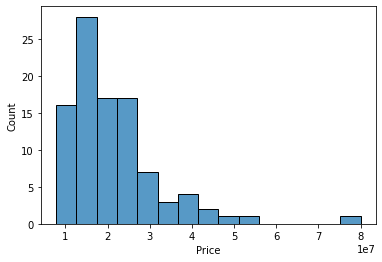

In [95]:
import seaborn as sns
ax=sns.histplot(x=df['Price'])
plt.show()

In [67]:
prices=df['Price']
print('The mean price is',np.mean(df['Price']))
print('The standard deviation of price is',np.std(df['Price']))

The mean price is 21109869.6185567
The standard deviation of price is 10899409.896295058


In [99]:
number_of_apartments=[]
for i in range (0,len(df['Name'])):
    number_of_apartments.append(df['Name'][i][0])

In [104]:
for i in range(0, len(number_of_apartments)): 
    number_of_apartments[i] = int(number_of_apartments[i]) 

In [111]:
print('The mean number of rooms is',round(np.mean(number_of_apartments),0))

The mean number of rooms is 2.0


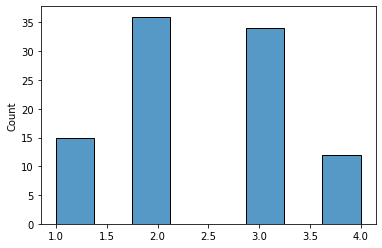

In [108]:
import seaborn as sns
ax=sns.histplot(x=number_of_apartments)
plt.show()

In [140]:
areas=df['Area']
area=[]
for i in range(0,len(areas)):
    area.append(areas[i].split()[0])

In [141]:
for i in range(0,len(area)):
    if area[i]=="черновая":
        area[i]=None
    else:
        area[i]=float(area[i])

In [142]:
print('The mean area is',np.mean(area[i]))

The mean area is 80.0


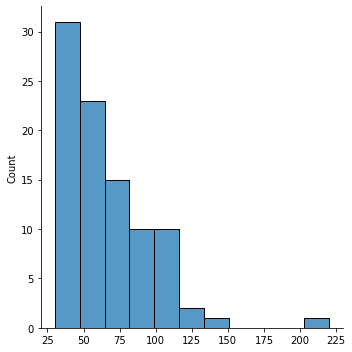

In [143]:
ax=sns.displot(x=area)
plt.show()